In [48]:
import scipy as sp
import scipy.interpolate as spi
import matplotlib.pylab as plt
%matplotlib inline

In [41]:
# %load ../Tools/Histogram.py
# %load ../Tools/Histogram.py
import numpy as np


class Histogram():
    '''
    Class to storage histograms
    '''
    def __init__(self, data=[], nbin=None, minlim=None, maxlim=None):
        '''
        Creates an histogram from a given a list (empty by defoult),
        with low and high limits, by defoult are the minimum and maximum
        of de data sample and the bin number, by default the number of
        data squareroot
        '''

        if len(data) == 0:
            if minlim == 'nada' or maxlim == 'nada' or nbin == 'nada':
                auxs = 'In order to build an empty histogram it '
                auxs += 'is needed a minlim, maxlim and nbin'
                raise ValueError(auxs)
                return
            else:
                self.minlim = minlim
                self.maxlim = maxlim
                self.nbin = nbin

        else:
            if minlim is None:
                self.minlim = min(data)
            else:
                self.minlim = minlim
            if maxlim is None:
                self.maxlim = max(data)
            else:
                self.maxlim = maxlim
            if nbin is None:
                self.nbin = int(len(data)**0.5)
            else:
                self.nbin = nbin

        self.binsize = float(self.maxlim-self.minlim)/float(self.nbin)
        self.hist = np.array([])
        self.bins = np.array([])

        self.Build_hist(data)

    def __add__(self, hist):
        '''
        Suming histograms
        '''

        if not self.minlim == hist.minlim or not self.maxlim == hist.maxlim\
                or not self.nbin == hist.nbin:
            raise ValueError('Histograms are not compatible')
        else:
            auxhist = Histogram([], self.nbin, self.minlim, self.maxlim)
            auxhist.hist = self.hist + hist.hist
        return auxhist

    def Build_hist(self, data):
        '''
        Creating histogram using numpy ones but with bin centers instead
        '''
        auxhist, auxbins = np.histogram(np.array(data), self.nbin,
                                        [self.minlim, self.maxlim])
        auxbins = auxbins[:-1] + np.diff(auxbins)/2.
        self.hist = auxhist
        self.bins = auxbins

    def Fill_hist(self, data):
        '''
        Filling histogram
        '''
        data = np.array(data)
        self.hist += np.histogram(np.array(data), self.nbin, [self.minlim,
                                                              self.maxlim])[0]

    def Scale(self, factor):
        '''
        Explicit __rmul__, scales the histogram by a factor
        '''
        self.hist = factor*self.hist
        return self


In [151]:
class PDF():
    '''
    Class to deal with spectrum and build a PDF interpolating an histogram
    '''
    
    def __init__ (self, histogram = [], interpolation='linear'):
    
        self.Nevs = 0.
        self.minlim = 0
        self.maxlim = 0
        self.pdf = spi.interp1d
        self.interpolation = interpolation
        if histogram:
            self.Build_PDF(histogram)
    
    def Build_PDF(self, hist):
        hist.Scale(1./(hist.hist.sum()*hist.binsize))
        self.pdf = spi.interp1d( hist.bins, hist.hist, kind=self.interpolation)
        self.Nevs = 1.
        self.minlim = hist.bins[0]
        self.maxlim = hist.bins[-1]

In [152]:
auxlist = np.random.normal(5,2,10000000)
a = Histogram(auxlist,100,0,10)
a.hist


array([  9278,  10498,  11802,  13357,  15008,  16611,  18966,  20541,
        23375,  25756,  28330,  31435,  34195,  38037,  41747,  44803,
        49270,  53585,  57372,  62559,  67137,  72043,  77792,  82418,
        88526,  94294,  99869, 105760, 112148, 117434, 123540, 129683,
       135711, 141225, 147597, 153688, 158773, 163787, 169253, 174249,
       177651, 183314, 185906, 189282, 192304, 195201, 196908, 198136,
       199599, 199464, 199386, 198277, 198532, 196243, 194529, 192606,
       188987, 186323, 181567, 178505, 173593, 170171, 163929, 158400,
       153470, 147537, 141991, 135615, 130496, 124452, 117921, 111426,
       106129, 100524,  93926,  88304,  82561,  77586,  71887,  67037,
        62121,  57426,  53396,  48681,  44969,  41218,  37455,  34441,
        30911,  28362,  25615,  23000,  20634,  18599,  16851,  15012,
        13236,  12002,  10537,   9373])

In [159]:
b = PDF(a,'linear')

In [164]:
b.pdf

TypeError: unsupported operand type(s) for *: 'int' and 'interp1d'

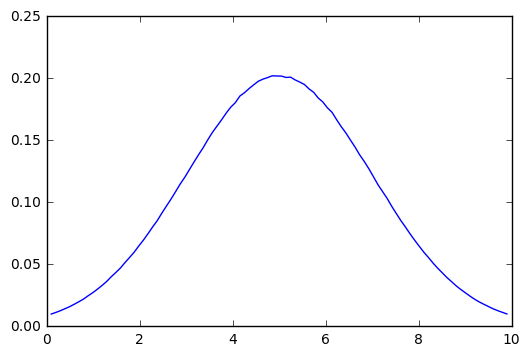

In [161]:
x = np.linspace(0.1,9.9,100)
y = b.pdf(x)

plt.plot(x,y)

In [162]:
sp.integrate.quad(b.pdf,b.minlim,b.maxlim)

(0.99905596151431, 3.540214509389905e-05)